# Import Libraries

In [1]:
# for drive access
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# standard libraries
import numpy as np
import pandas as pd

In [3]:
# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Load training data csv

In [4]:
df = pd.read_csv('/content/drive/MyDrive/project/clean_train_df_w_npy.csv')

df.head()

,primary_label,type,latitude,longitude,rating,filename,duration,country,continent,filename_npy
0,comsan,call,50.7542,4.5672,4.0,comsan/XC587730.ogg,5.746937,BE,EUROPE,comsan/XC587730.npy
1,eaywag1,call,69.3585,88.2378,3.0,eaywag1/XC675944.ogg,5.355000,RU,EUROPE,eaywag1/XC675944.npy
2,comsan,call,41.1698,0.9761,5.0,comsan/XC664012.ogg,10.488000,ES,EUROPE,comsan/XC664012.npy
3,barswa,call,NaN,NaN,2.5,barswa/XC268804.ogg,76.538813,UNKNOWN,UNKNOWN,barswa/XC268804.npy
4,barswa,song,53.9299,-2.9833,2.5,barswa/XC690498.ogg,83.095500,GB,EUROPE,barswa/XC690498.npy


# Set global variables

In [5]:
colors = [
    '#ffa15a'
    ,'#636efa'
    ,'#ef553b'
]

In [6]:
sr=16000

# Check for class imbalance

## by number of samples

In [9]:
counts = df['primary_label'].value_counts().reset_index().sort_values('index', ascending=False)
counts

,index,primary_label
1,eaywag1,351
0,comsan,352
2,barswa,341


In [16]:
np.max(counts['primary_label'])

352

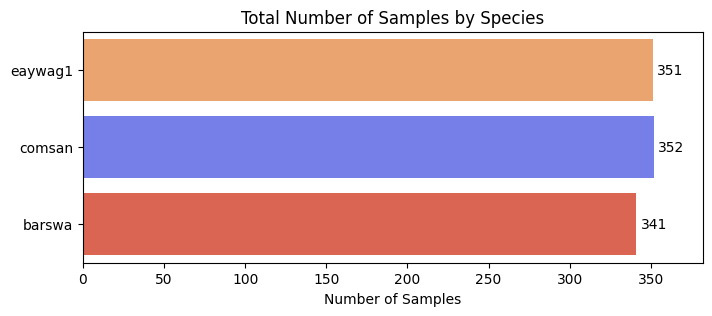

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,3))

sns.barplot(x='primary_label', y='index', data=counts, palette=colors, ax=axes)
axes.bar_label(axes.containers[0], fmt='%i', padding=3)
axes.set(xlim=[0, np.max(counts['primary_label']) + 30])
axes.set(ylabel='')
axes.set(xlabel='Number of Samples')
axes.set(title='Total Number of Samples by Species')

plt.show()

## by duration

In [27]:
duration_sum = df[['primary_label', 'duration']].groupby('primary_label').sum('duration').reset_index().sort_values('primary_label', ascending=False)
duration_sum['duration_mins'] = duration_sum['duration'] / 60

duration_sum

,primary_label,duration,duration_mins
2,eaywag1,11568.778688,192.812978
1,comsan,10923.561750,182.059363
0,barswa,12535.445813,208.924097


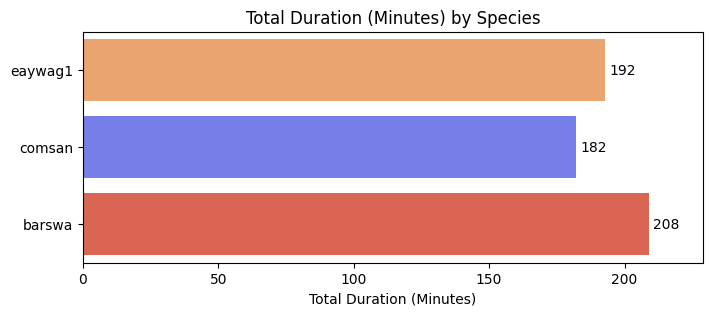

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,3))

sns.barplot(x='duration_mins', y='primary_label', data=duration_sum, palette=colors, ax=axes)
axes.bar_label(axes.containers[0], fmt='%i', padding=3)
axes.set(xlim=[0, np.max(duration_sum['duration_mins']) + 20])
axes.set(ylabel='')
axes.set(xlabel='Total Duration (Minutes)')
axes.set(title='Total Duration (Minutes) by Species')

plt.show()

# Check for types by species

In [33]:
duration_call_types = df[['primary_label', 'type', 'duration']].groupby(['primary_label', 'type']).sum('duration').reset_index().sort_values('primary_label', ascending=False)
duration_call_types['duration_mins'] = duration_call_types['duration'] / 60

duration_call_types

,primary_label,type,duration,duration_mins
8,eaywag1,blank,1204.041313,20.067355
9,eaywag1,both,1145.480687,19.091345
10,eaywag1,call,6504.292312,108.404872
11,eaywag1,song,2714.964375,45.249406
4,comsan,blank,1667.876062,27.797934
5,comsan,both,290.753312,4.845889
6,comsan,call,8299.108562,138.318476
7,comsan,song,665.823813,11.097064
0,barswa,blank,705.952937,11.765882
1,barswa,both,2813.386625,46.889777


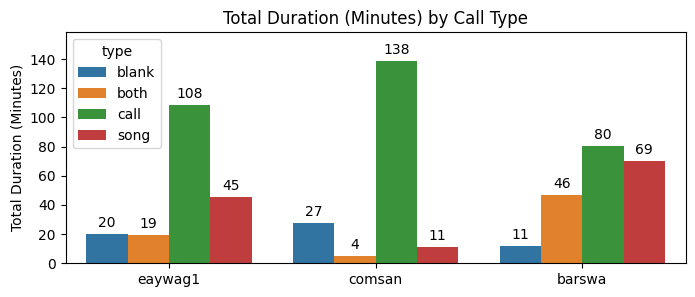

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,3))

sns.barplot(x='primary_label', y='duration_mins', data=duration_call_types, hue='type', ax=axes)
axes.bar_label(axes.containers[0], fmt='%i', padding=3)
axes.bar_label(axes.containers[1], fmt='%i', padding=3)
axes.bar_label(axes.containers[2], fmt='%i', padding=3)
axes.bar_label(axes.containers[3], fmt='%i', padding=3)
axes.set(ylim=[0, np.max(duration_call_types['duration_mins']) + 20])
axes.set(ylabel='Total Duration (Minutes)')
axes.set(xlabel='')
axes.set(title='Total Duration (Minutes) by Call Type')

plt.show()

# Check for rating by species

In [38]:
df['rating_binary'] = np.where(df['rating'] > 3.0, 'good', 'bad')

duration_rating = df[['primary_label', 'rating_binary', 'duration']].groupby(['primary_label', 'rating_binary']).sum('duration').reset_index().sort_values('primary_label', ascending=False)
duration_rating['duration_mins'] = duration_rating['duration'] / 60

duration_rating

,primary_label,rating_binary,duration,duration_mins
4,eaywag1,bad,3000.285687,50.004761
5,eaywag1,good,8568.493000,142.808217
2,comsan,bad,2463.168563,41.052809
3,comsan,good,8460.393187,141.006553
0,barswa,bad,3771.066375,62.851106
1,barswa,good,8764.379437,146.072991


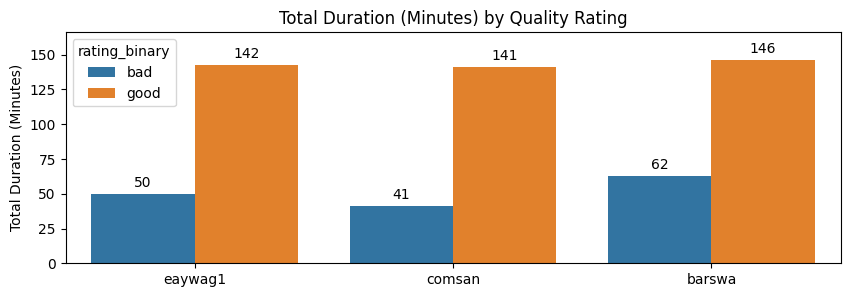

In [56]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,3))

sns.barplot(x='primary_label', y='duration_mins', data=duration_rating, hue='rating_binary', ax=axes)
axes.bar_label(axes.containers[0], fmt='%i', padding=3)
axes.bar_label(axes.containers[1], fmt='%i', padding=3)
axes.set(ylim=[0, np.max(duration_rating['duration_mins']) + 20])
axes.set(ylabel='Total Duration (Minutes)')
axes.set(xlabel='')
axes.set(title='Total Duration (Minutes) by Quality Rating')

plt.show()

# Check for continents by species

In [53]:
grouped_continent = df.groupby(['primary_label', 'continent']).size().reset_index(name='Count')
pivot_continent = grouped_continent.pivot(index='continent', columns='primary_label', values='Count')
pivot_continent

primary_label,barswa,comsan,eaywag1
continent,,,
AFRICA,6.0,5.0,4.0
AMERICAS,53.0,NaN,NaN
ASIA,23.0,18.0,35.0
EUROPE,242.0,329.0,312.0
UNKNOWN,17.0,NaN,NaN


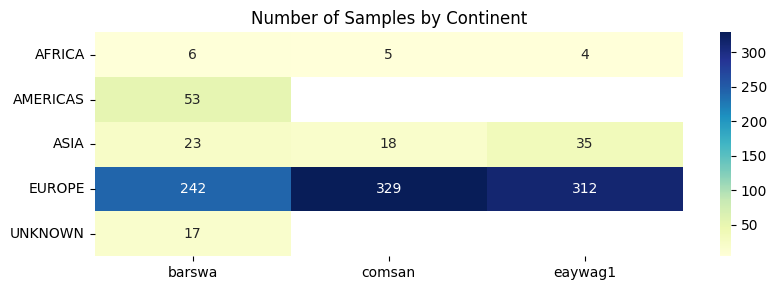

In [54]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8.5,3))

sns.heatmap(pivot_continent, cmap='YlGnBu', annot=True, fmt='g', cbar=True, ax=axes)
axes.set(title='Number of Samples by Continent')
axes.set(xlabel='')
axes.set(ylabel='')

plt.tight_layout()

plt.show()